In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Counter

sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.15)

# Visualize the filtered annotations
##### ℹ️ This notebook requires `data/1-annotations_filtered.parquet`
This notebook perform EDA on the previously cleaned dataset.

In [41]:
annotations = pd.read_parquet('../data/1-annotations_filtered.parquet')
annotations.head(1)

,uid,name,likeCount,animationCount,commentCount,tags,categories,thumbnails,description,faceCount,createdAt,vertexCount,archives
0,11102f046e7846b8b4053bce5779d95c,Research>Mechanisms>Systems>Mark VI/VII Gate,2,0,0,"[gate, mark, metroid, vi, prime, 2, vii]","[architecture, electronics-gadgets]",[https://media.sketchfab.com/models/11102f046e...,Both 6 and 7 use the same model.\n\nMechanism:...,208,2022-05-06T03:49:10.436446,118,"{'extra': None, 'glb': {'faceCount': 208, 'siz..."


## Categories distribution

/scratch_local/ipykernel_3592002/2722530234.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="tab20")


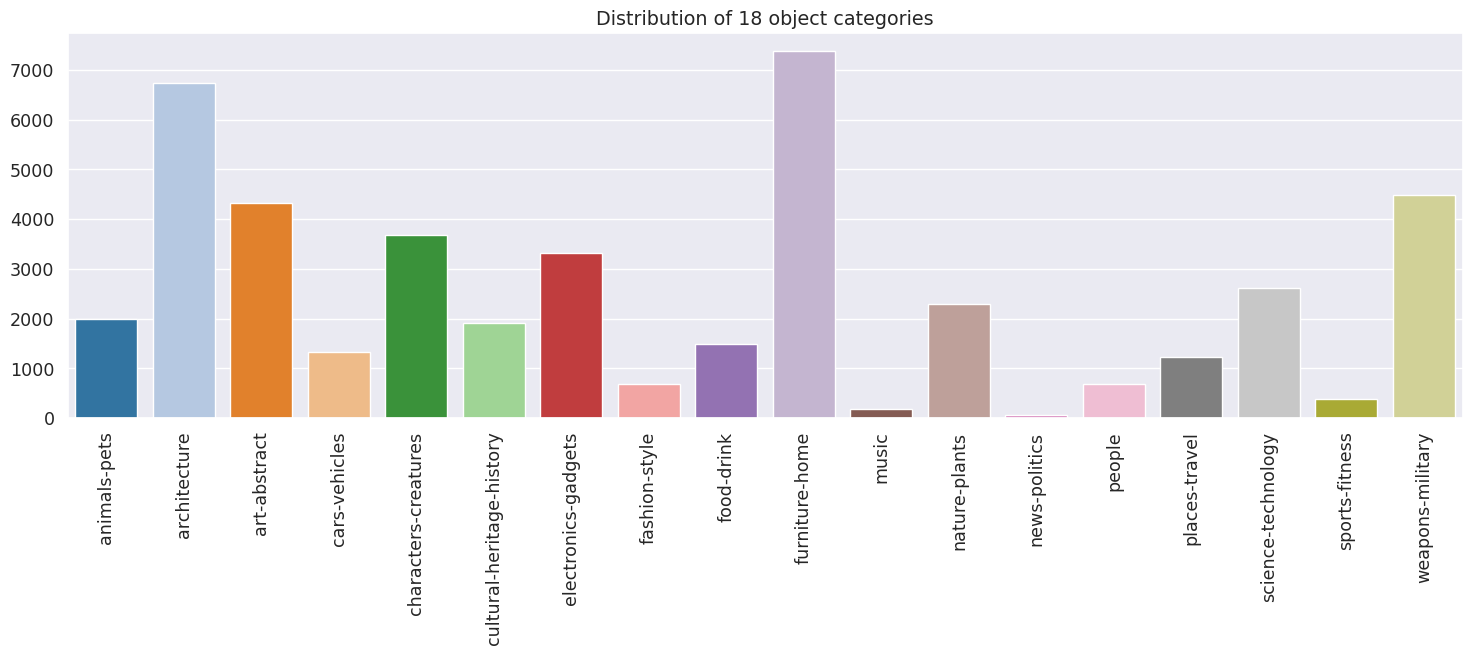

In [13]:
categories = map(lambda x: list(x), annotations['categories'])
categories = [c for category in categories for c in category]
categories_counter = Counter(categories)
sorted_items = sorted(categories_counter.items())
x, y = zip(*sorted_items)

plt.figure(figsize=(18, 5))
sns.barplot(x=x, y=y, palette="tab20")
plt.xticks(rotation=90)
plt.title(f'Distribution of {len(x)} object categories')
plt.show()

## Tags distribution

/scratch_local/ipykernel_3592002/3548262011.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="tab20")


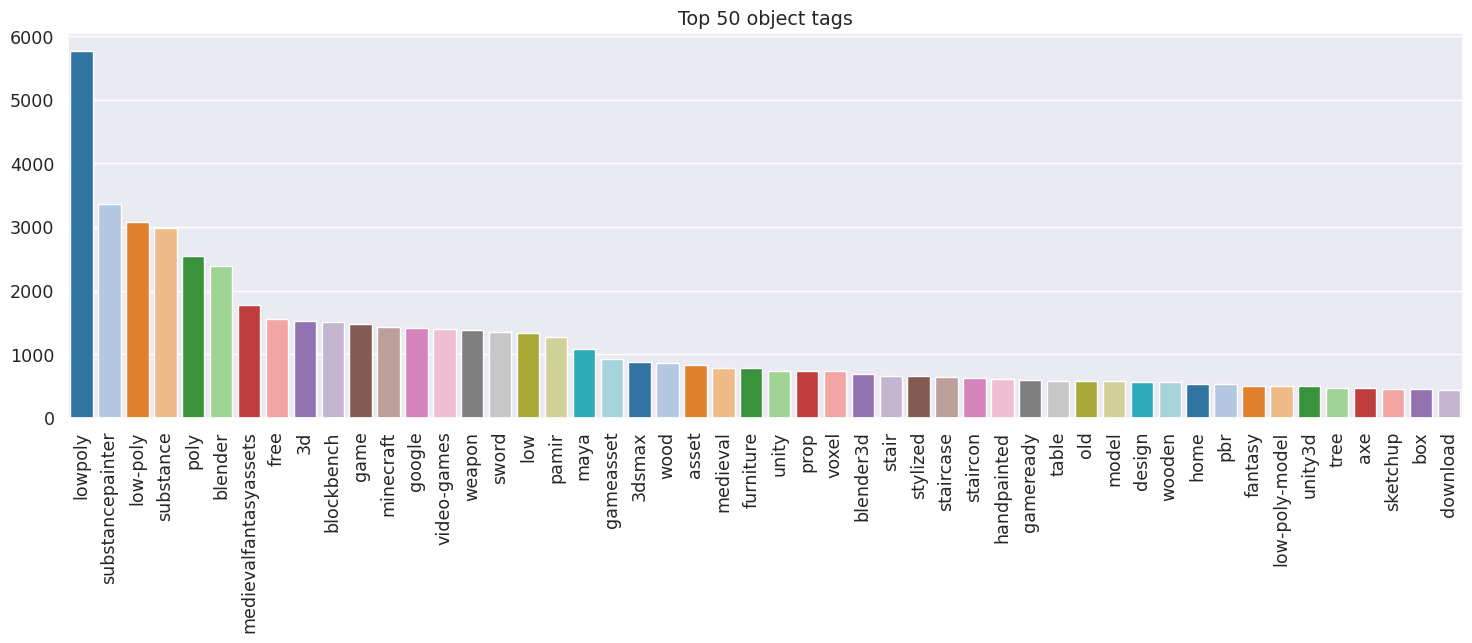

In [14]:
tags = map(lambda x: list(x), annotations['tags'])
tags = [t for tag in tags for t in tag]
tags_counter=Counter(tags).most_common(50)
x, y = zip(*tags_counter)

plt.figure(figsize=(18, 5))
sns.barplot(x=x, y=y, palette="tab20")
plt.xticks(rotation=90)
plt.title(f'Top {len(x)} object tags')
plt.show()

## Date distribution

/scratch_local/ipykernel_3592002/3167744791.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=years, palette="tab10")


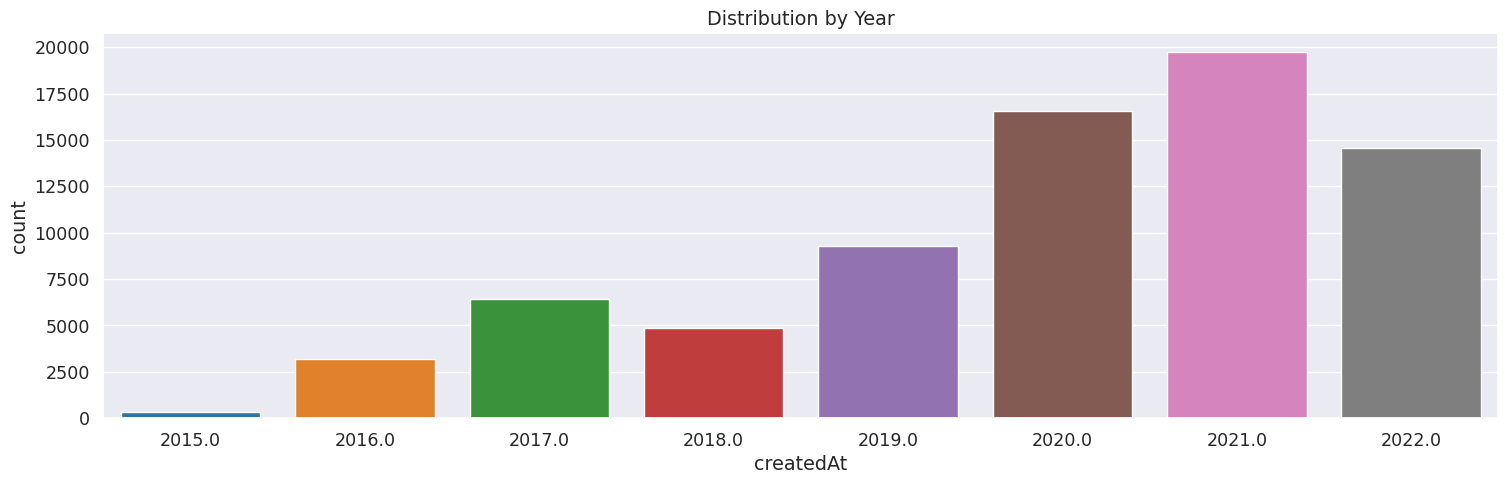

In [ ]:
timestamps_dt = pd.to_datetime(annotations['createdAt'], errors='coerce')
years = timestamps_dt.dt.year

plt.figure(figsize=(18, 5))
sns.countplot(x=years, palette="tab10")
plt.title("Distribution by Year")
plt.show()